# Titanic - Exploratory Data Analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib, matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.filterwarnings("ignore")


## Load and Verify Data

In [2]:
# load data into pandas dataframe
df = pd.read_csv("data/titanic.csv")

In [3]:
# examine first few lines
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Dictionary 

|    Variable    |   Description       | Key          
|----------------|---------------------|----- 
| **Survived**       | Survival            |0=No, 1=Yes
| **Pclass**        | Ticket Class        |1=1st, 2=2nd, 3=3rd
| **SibSp**        |   Number of siblings/spouses aboard    
| **Parch**        |   Number of parents /children aboard 
| **Ticket**        |   Ticket number 
| **Fare**        |   Passenger fare 
| **Cabin** | Cabin number 
| **Embarked** | Port of embarkation | C=Cherbourg, Q=Queenstown, S=Southampton




In [4]:
# basic information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# basic statistics on columns with numerical values
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# gives basic statistics for a particular column
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## Basic Data Analysis Checklist

For each variable, it's good to confirm at a minimum:
 - which columns have missing values and their frequency
 - for continuous variables, understand distribution & central tendency
 - for discrete variables (factors), value counts and percentages
 - correlations between the numerical variables
 

### Missing Values 

<AxesSubplot:>

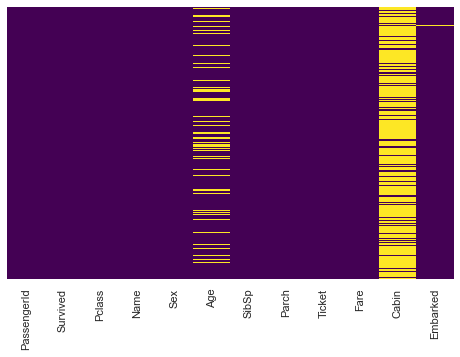

In [7]:
# Cabin values is mostly missing, age has missing values, a couple for embarked 
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [8]:
# missing value counts
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###  Examine Individual Columns (Categorical)

In [9]:
# value counts for each category
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
# percentages for each category
df.Sex.value_counts(normalize=True).round(2)

male      0.65
female    0.35
Name: Sex, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

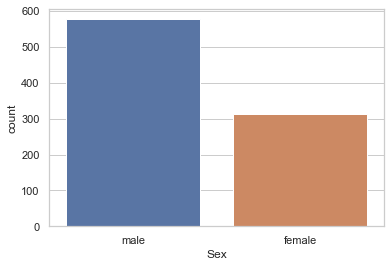

In [11]:
# counts visualized
sns.countplot(x="Sex", data=df)

### Examine Individual Columns (Continuous)

In [12]:
# basic statistics for a specific column
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

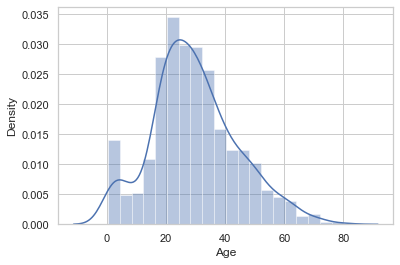

In [13]:
# distplot plots histogram and kde by default
sns.distplot(df.Age.dropna())

<AxesSubplot:xlabel='Age'>

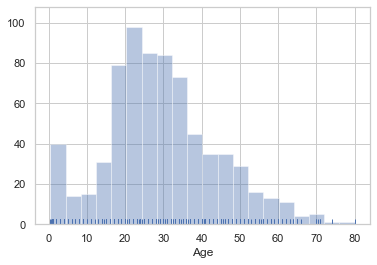

In [14]:
# kde, hist, run can be set to True or False
sns.distplot(df.Age.dropna(), kde=False, rug=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

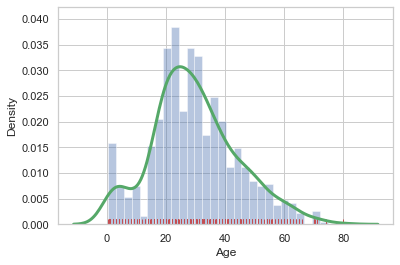

In [15]:
# parameters can be set individuall for kde, rug, and hist
sns.distplot(df.Age.dropna(),bins=30, rug=True,
            kde_kws={"color":"g","linewidth":3},
            rug_kws={"color":"r"})

<AxesSubplot:xlabel='Age', ylabel='Density'>

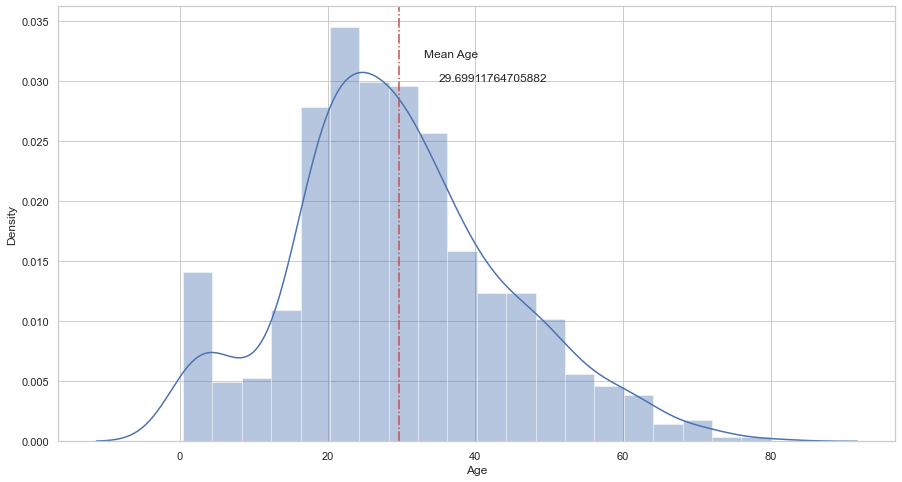

In [16]:
# matplotlib can be used to customize figure
plt.figure(figsize=(15,8))
plt.axvline(df.Age.mean(),linestyle="-.",color='r')
plt.text(33,.032, "Mean Age")
plt.text(35,.03, df.Age.mean())
sns.distplot(df.Age.dropna())

# Exploratory Data Analysis

## For EDA always pose questions

### 1. How many passengers survived?

<AxesSubplot:xlabel='Survived', ylabel='count'>

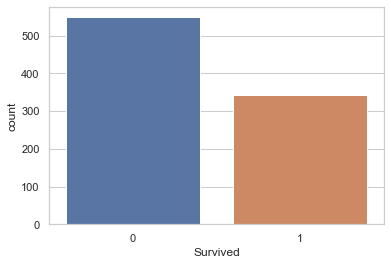

In [19]:
sns.countplot(x="Survived", data=df)

In [24]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

### 2. What was the probability of survival?

In [25]:
df.Survived.value_counts(normalize=True).round(2)

0    0.62
1    0.38
Name: Survived, dtype: float64

### 3. What was the probability of survival (by sex)?

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

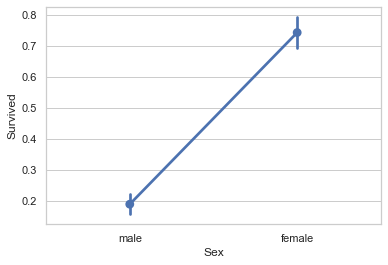

In [23]:
# male vs female survival rate
sns.pointplot(x="Sex", y="Survived", data=df)

In [24]:
df.groupby(['Sex']).Survived.value_counts(normalize=True).round(2)

Sex     Survived
female  1           0.74
        0           0.26
male    0           0.81
        1           0.19
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

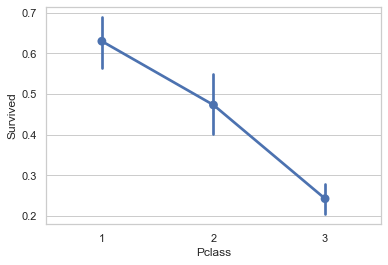

In [20]:
# survival rate by ticket class
sns.pointplot(x="Pclass", y="Survived", data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

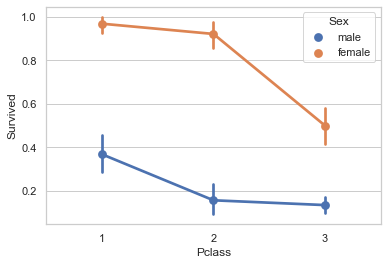

In [21]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=df)

In [29]:
df.groupby(['Pclass']).Survived.value_counts(normalize=True).round(2)

Pclass  Survived
1       1           0.63
        0           0.37
2       0           0.53
        1           0.47
3       0           0.76
        1           0.24
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

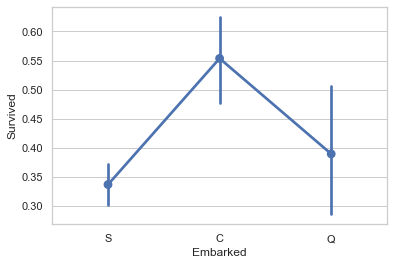

In [22]:
sns.pointplot(x="Embarked", y="Survived", data=df)

## Pivot Tables are Handy for Summary Information

#### What were survival rates by point of embarkation

In [25]:
# alternative way of summarizing survival rates
pd.pivot_table(df,index=["Embarked"],values=["Survived"])

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


#### What were survival rates by Sex and Cabin Class

In [26]:
pd.pivot_table(df,index=["Sex","Pclass"],values=["Survived"]).round(2)

Survived
Sex    Pclass          
female 1           0.97
       2           0.92
       3           0.50
male   1           0.37
       2           0.16
       3           0.14

In [27]:
pd.pivot_table(df,index=["Embarked","Pclass"],values=["Survived"]).round(2)

Survived
Embarked Pclass          
C        1           0.69
         2           0.53
         3           0.38
Q        1           0.50
         2           0.67
         3           0.38
S        1           0.58
         2           0.46
         3           0.19

#### What was average fare paid by cabin class?

In [28]:

pd.pivot_table(df,index=["Pclass"],values=["Fare"]).round(2)


,Fare
Pclass,
1,84.15
2,20.66
3,13.68


### What were survival rates by embarkation and cabin class?

In [37]:
embark = pd.pivot_table(df,index=["Embarked","Pclass"],values=["Survived"],aggfunc=[np.sum,len])

In [38]:
embark['pct'] = (embark['sum']/embark['len']).round(2)

In [39]:
embark

sum      len   pct
                Survived Survived      
Embarked Pclass                        
C        1            59       85  0.69
         2             9       17  0.53
         3            25       66  0.38
Q        1             1        2  0.50
         2             2        3  0.67
         3            27       72  0.38
S        1            74      127  0.58
         2            76      164  0.46
         3            67      353  0.19

In [45]:
emb = pd.pivot_table(df,index=["Embarked"],values=["Survived"])

In [46]:
emb

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

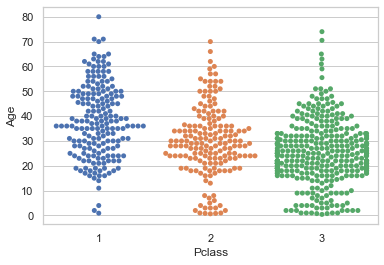

In [40]:
# age distribution by cabin class with swarmplot
sns.swarmplot(x="Pclass",y="Age", data=df)